In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

df=pd.read_csv("/content/titanic-passengers.csv",delimiter=";")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [15]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Embarked"].fillna("S",inplace=True)
print(df["Embarked"].describe())


count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [16]:
df["Cabin"].fillna("B96 B98",inplace=True)
df["Cabin"].isnull().sum()

0

In [17]:
cleanup_s = {"Sex":{"male" : 0 , "female":1}}
df.replace(cleanup_s,inplace=True)
cleanup_survived = {"Survived":{"No" : 0 , "Yes":1}}
df.replace(cleanup_survived,inplace=True)
encoder=LabelEncoder()
df["Embarked"]=encoder.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,B96 B98,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,2
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,B96 B98,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,B96 B98,2
4,672,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,B96 B98,0
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,B96 B98,0
888,535,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,B96 B98,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,B96 B98,2


In [18]:
df1=df.drop("Name",axis=1)
df1=df1.drop("Ticket",axis=1)
df1=df1.drop("Cabin",axis=1)

In [19]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [20]:

test=df["Name"]

li=[]
for index, value in test.items():
  li.append(Title_Dictionary[test[index].split(', ')[1].split('.')[0]])
print(li)

['Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Officer', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Officer', 'Mrs', 'Royalty', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Miss', 'Mrs', 'Master', 'Officer', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Master', 'Miss', 'Mrs', 'Officer', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Miss', 'Miss', 'Miss', 'Mrs', 'Master', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Master', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Master', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Officer', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 

In [21]:
titles=pd.Series(li)
df1["Titles"]=titles
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,343,0,2,0,28.000000,0,0,13.0000,2,Mrs
1,76,0,3,0,25.000000,0,0,7.6500,2,Mrs
2,641,0,3,0,20.000000,0,0,7.8542,2,Mrs
3,568,0,3,1,29.000000,0,4,21.0750,2,Mrs
4,672,0,1,0,31.000000,1,0,52.0000,2,Mrs
...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,1,14.000000,1,0,30.0708,0,Mrs
887,61,0,3,0,22.000000,0,0,7.2292,0,Mrs
888,535,0,3,1,30.000000,0,0,8.6625,2,Miss
889,102,0,3,0,29.699118,0,0,7.8958,2,Mrs


In [22]:
cleanup_t = {"Titles":{"Officer" : 0 , "Royalty":1, "Miss" : 2 , "Mrs" : 3 , "Master" : 4}}
df1.replace(cleanup_t,inplace=True)
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,343,0,2,0,28.000000,0,0,13.0000,2,3
1,76,0,3,0,25.000000,0,0,7.6500,2,3
2,641,0,3,0,20.000000,0,0,7.8542,2,3
3,568,0,3,1,29.000000,0,4,21.0750,2,3
4,672,0,1,0,31.000000,1,0,52.0000,2,3
...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,1,14.000000,1,0,30.0708,0,3
887,61,0,3,0,22.000000,0,0,7.2292,0,3
888,535,0,3,1,30.000000,0,0,8.6625,2,2
889,102,0,3,0,29.699118,0,0,7.8958,2,3


In [23]:
x = df1[['Pclass','Sex','Age','Fare','Embarked','Titles']]
y = df1['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.82


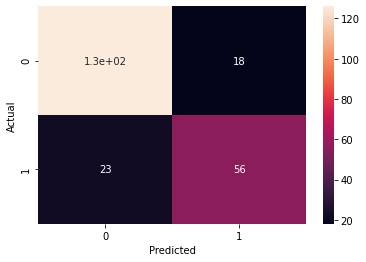

In [24]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [31]:
fpr1, tpr1, thresh1 = roc_curve(y_test,y_pred, pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test,random_probs)
print("AUC score= "auc_score1)

0.5


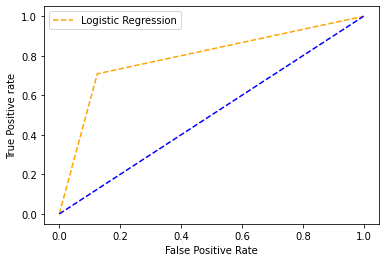

In [32]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The ROC/AUC curve is a tool used to determin if a classifier can diffentiate between positve and negative classes. if the value of the AUC approaches 1 it mean that the classifier is able to distinguish positif from negative class points. the closer the AUC score gets to 0 the less the classifier is able to distinguish positif from negative classes.